In [30]:
using DataFrames, PythonPlot, Distributions,CSV
using SpecialFunctions 
PythonPlot.svg(true)
include("simulations.jl")
include("branching.jl")
include("drawing.jl")
include("single_cell_models.jl")
FIG_PATH= "/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

"/Users/elevien/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/pop_growth_size/figures"

In [31]:
data_l = CSV.read("./data/fig3_data.csv",DataFrame);
data_l = dropmissing(data_l, :a)
cors_l= [cor(d.x,d.length) for d in groupby(data_l,:a)]
#data_p = CSV.read("./data/fig2_population_data.csv",DataFrame);

21-element Vector{Float64}:
 -0.032087643669228616
 -0.03403041796483142
 -0.03300270046886455
 -0.0332072932414703
 -0.03463726193846238
 -0.032246627975126105
 -0.03323656838050319
 -0.03467559305433117
 -0.03512756622752377
 -0.03344592258266669
  ⋮
 -0.03433803785908647
 -0.03538859443775016
 -0.034544140083191316
 -0.03340787014372199
 -0.03553620152116198
 -0.03277992402351356
 -0.03205238246430218
 -0.03154914710325993
 -0.03163794308503867

In [32]:
# get lineage cell data frames
data_cells_l = combine(groupby(data_l,[:lineage,:cell]),
    :length => (x -> x[1]) => :M0,
    :length => (x -> x[end]) => :Mf,
    :x => (x -> mean(x)) => :xbar,
    :a => (x -> x[1]) => :a,
    :time => (x -> x[end] - x[1]) => :τ)
data_cells_l[:,:y0] .= log.(data_cells_l[:,:M0])
data_cells_l[:,:ϕ] .= log.(data_cells_l[:,:Mf] ./data_cells_l[:,:M0]);
arange = unique(data_l[:,:a]);

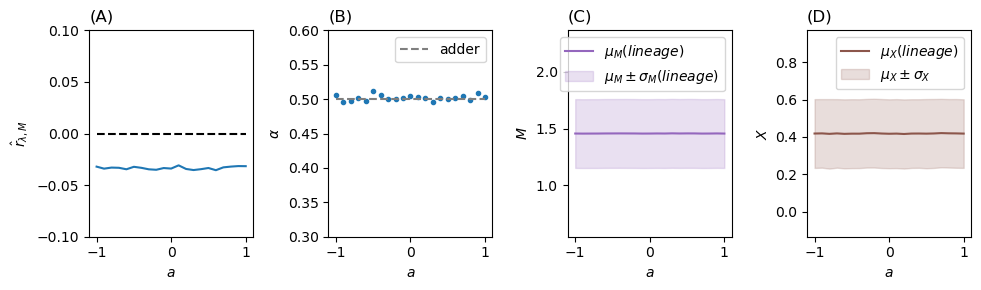

In [34]:


fig,axs = subplots(figsize=(10,3),ncols=4)

ax = axs[0]
ax.plot(arange,cors_l,"-",fillstyle="none",label=L"lineage")
#ax.plot(arange_p,cors_p,"+",fillstyle="none",label=L"population")
ax.plot(arange,zeros(length(arange)),"k--")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\hat{r}_{\lambda,M}")
#ax.legend(frameon=true)
ax.set_ylim(-0.1,0.1)
ax.set_title("(A)",loc="left")
#ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")

ax = axs[1]
alphas_l =  [-cov(d.ϕ,d.y0)/var(d.y0) for d in groupby(data_cells_l,:a)]
ax.plot(arange,alphas_l,".")
ax.plot(arange,ones(length(arange))/2,"C7--",label="adder")
ax.legend(frameon=true)
ax.set_ylim(0.3,0.6)
#ax.vlines(1, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], colors="k", linestyles="dotted")
ax.set_xlabel(L"a")
ax.set_ylabel(L"\alpha")


ax.set_title("(B)",loc="left")

ax = axs[2]
mu_l = [mean(d.length) for d in groupby(data_l,:a)]
std_l = [std(d.length) for d in groupby(data_l,:a)]

ax.plot(arange,mu_l,"C4-",fillstyle="none",label=L"\mu_M (lineage)")

# mu_p= [mean(d.length) for d in groupby(data_p,:a)]
# std_p = [std(d.length) for d in groupby(data_p,:a)]
# ax.plot(arange_p,mu_p,"C4+",fillstyle="none",label=L"\mu_M (population)")
ax.fill_between(arange,mu_l .-std_l,mu_l .+std_l,alpha=0.2,color="C4",label=L"\mu_M \pm \sigma_M (lineage)")
ax.set_xlabel(L"a")
ax.set_ylabel(L"M")
ax.legend(frameon=true)
ax.set_ylim(mu_l[1] - 3*std_l[1],mu_l[1] + 3*std_l[1])
ax.set_title("(C)",loc="left")

ax = axs[3]
mu_l = [mean(d.x) for d in groupby(data_l,:a)]
std_l = [std(d.x) for d in groupby(data_l,:a)]


ax.plot(arange,mu_l,"C5-",fillstyle="none",label=L"\mu_{X} (lineage)")

# mu_p = [mean(d.x) for d in groupby(data_p,:a)]
# std_p = [std(d.x) for d in groupby(data_p,:a)]
# ax.plot(arange_p,mu_p,"C5+",fillstyle="none",label=L"\mu_{X} (population)")
ax.fill_between(arange,mu_l .-std_l,mu_l .+ std_l,color="C5",alpha=0.2,label=L"\mu_{X} \pm \sigma_{X}")
ax.set_xlabel(L"a")
ax.set_ylabel(L"X")
ax.set_title("(D)",loc="left")
ax.legend(frameon=true)
ax.set_ylim(mu_l[1] - 3*std_l[1],mu_l[1] + 3*std_l[1])
tight_layout()

savefig(FIG_PATH*"/Fig3.pdf",bbox_inches="tight")
fig

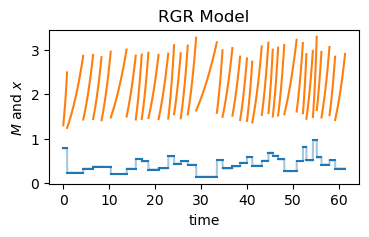

In [66]:
fig,ax = subplots(figsize=(4,2))

ax.set_title("RGR Model")##
ax.plot(df_RG.time,df_RG.x,"C0",alpha=0.4)
for cell in unique(df_RG.cell)
    df = df_RG[df_RG.cell .== cell,:]
    ax.plot(df.time,df.x,"C0")
    ax.plot(df.time,df.length/0.7,"C1")
end
ax.set_ylabel(L"M\text{ and }x")
ax.set_xlabel("time")



#savefig(FIG_PATH*"/OU_vs_RGR.pdf",bbox_inches="tight")
fig



In [ ]:
dt = 0.01
τ =3
D = 0.01
σY = 0.05
σx = sqrt(D*τ)
α = 0.5
θ_OU = τ,D,α,σY,dt
θ_RG = σx,α,σY,dt
init = [0,1.,1]
num_cells = 5000

σxrange = collect(0.01:0.01:0.6)

data_all_params1 = []
data_all_params2 = []
for i in 1:length(σxrange)
    θ_RG = σxrange[i],α,σY,dt,0.6
    data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
    df = DataFrame(data,["time","x","length","cell", "lineage"]);
    df = df[df.cell .> 10,:];
    df.time = df.time .- df.time[1];
    df.cell = df.cell .- minimum(df.cell);
    df[:,:T] = cumsum(df.x)*mean(diff(df.time));
    df_RG = df;


    push!(data_all_params1,df_RG)

    θ_RG = σxrange[i],α,σY,dt,0.
    data= make_lineages(generator_RG,init,θ_RG,num_cells,num_lins);
    df = DataFrame(data,["time","x","length","cell", "lineage"]);
    df = df[df.cell .> 10,:];
    df.time = df.time .- df.time[1];
    df.cell = df.cell .- minimum(df.cell);
    df[:,:T] = cumsum(df.x)*mean(diff(df.time));
    df_RG = df;
    push!(data_all_params2,df_RG)
end

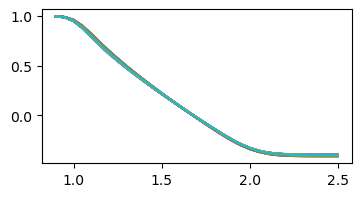

In [61]:
fig,ax = subplots(figsize=(4,2))
lrange = collect(0.9:0.05:2.5)
for d in data_all_params1
    l = d.length
    ax.plot(lrange,1 .-[sum(l[l .< s])/length(l) for s in lrange])
end
fig

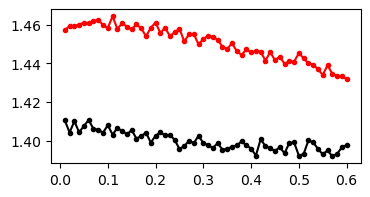

In [62]:

fig,ax = subplots(figsize=(4,2))

means = [mean(d.length) for d in data_all_params1]
ax.plot(σxrange,means,"k.-")

means = [mean(d.length) for d in data_all_params2]
ax.plot(σxrange,means,"r.-")
fig